<a href="https://colab.research.google.com/github/Yashvishe13/Deep-Learning/blob/main/CNN_fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [2]:
# Loading data
fashion_mnist = tf.keras.datasets.fashion_mnist

In [3]:
# Splitting data into training and test set
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0
X_train.shape

4431872/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)

In [4]:
# Since Conv2D layer requires data in N x H x W x C dimensions
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
X_train.shape

(60000, 28, 28, 1)

In [5]:
# Number of classes
K = len(set(y_train))
print('Number of classes:', K)

Number of classes: 10


In [6]:
X_train[0].shape

(28, 28, 1)

In [29]:
from tensorflow.python.keras.backend import dropout
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu') (i)
x = Conv2D(32, (3,3), strides=2, activation='relu') (i)
x = Conv2D(64, (3,3), strides=2, activation='relu') (x)
x = Conv2D(128, (3,3), strides=2, activation='relu') (x)
x = Flatten() (x)
x = Dropout(0.2) (x)
# x = Dense(1024, activation='relu') (x)
# x = Dropout(0.2) (x)
x = Dense(512, activation='relu') (x)
x = Dropout(0.2) (x)
x = Dense(K, activation='softmax') (x)

model = Model(i, x)

In [30]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5171 - accuracy: 0.8064 - val_loss: 0.4068 - val_accuracy: 0.8507
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3601 - accuracy: 0.8666 - val_loss: 0.3527 - val_accuracy: 0.8710
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3148 - accuracy: 0.8802 - val_loss: 0.3232 - val_accuracy: 0.8794
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2809 - accuracy: 0.8932 - val_loss: 0.3059 - val_accuracy: 0.8842
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2540 - accuracy: 0.9035 - val_loss: 0.2991 - val_accuracy: 0.8947
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2313 - accuracy: 0.9134 - val_loss: 0.2978 - val_accuracy: 0.8949
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2124 - accuracy: 0.9194 - val_loss: 0.3108 - val_ac

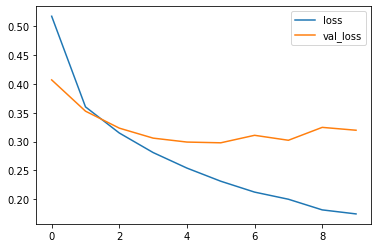

In [31]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

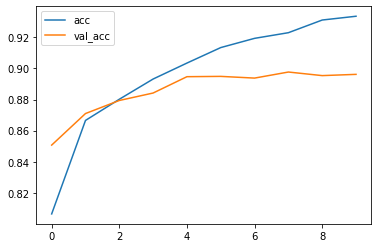

In [32]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization


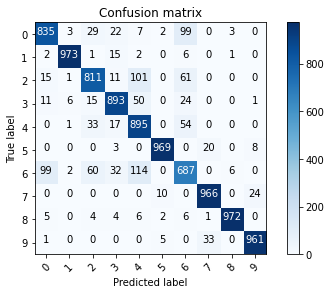

In [33]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))